<a href="https://colab.research.google.com/github/kristen-frazier/hate-speech-project-nlp/blob/main/Hate_Speech_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload hate speech data from hatespeechdata.com
#Dataset git repo: https://github.com/bvidgen/Dynamically-Generated-Hate-Speech-Dataset
#Dataset url: https://github.com/bvidgen/Dynamically-Generated-Hate-Speech-Dataset/blob/main/Dynamically%20Generated%20Hate%20Dataset%20v0.2.3.csv
#Description of Data: Learning From the Worst (Dynamically generated hate speech dataset)
#Link to publication containing data: https://aclanthology.org/2021.acl-long.132/
#Task description: Multi-category hate speech detection
#Details of task: Hate detection with fine-grained labels for the type and target of hate. Generated over 4 rounds of human-and-model-in-the-loop adversarial data generation. Collected through Dynabench.
#Size of dataset: 41,255
#Percentage abusive: 54%
#Language: English
#Level of annotation: posts
#no inter-annotator agreement (IAA) score given
#Platform: Synthetically generated by humans to mimic real-world social media posts
#Medium: text
#Reference: Vidgen, B., Thurush, T., Waseem, Z., Kiela, D., 2021. Learning from the worst: dynamically generated datasets to improve online hate detection. In Proceedings of the 59th Meeting of the Association for Computational Lingusitics (pp. 1667-1682).

In [ ]:
#import dataframe library
import pandas as pd

In [ ]:
#read csv
#create variable for data (hsd refers to our dataset of hate speech data)
hsd=pd.read_table('/content/Dynamically Generated Hate Dataset v0.2.3.csv',
                  header=0,
                  sep=',') #error when reading, used sep to solve)

In [ ]:
#creating our dataframe
hsd.head()

,index,acl.id,X1,text,label,type,target,level,split,round.base,annotator,round,acl.id.matched
0,1,acl1,1,dalits are lowlives,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
1,2,acl10,2,gay people are a burden to our society,hate,notgiven,notgiven,original,train,1,GNZuCtwed3,1,NaN
2,3,acl100,3,Arabs are not welcome,hate,notgiven,notgiven,original,train,1,vDe7GN0NrL,1,NaN
3,4,acl1000,4,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,original,train,1,oemYWm1Tjg,1,NaN
4,5,acl10000,5,bananas are for black people,hate,notgiven,notgiven,original,test,1,QiOKkCi7F8,1,NaN


In [ ]:
hsd.shape

(41144, 13)

In [ ]:
hsd.columns

Index(['index', 'acl.id', 'X1', 'text', 'label', 'type', 'target', 'level',
       'split', 'round.base', 'annotator', 'round', 'acl.id.matched'],
      dtype='object')

In [ ]:
#dropping columns
hsd=hsd.drop(['index', 'X1', 'level', 'split', 'round.base', 'annotator', 'round', 'acl.id.matched'],  axis = 1)
hsd.columns

Index(['acl.id', 'text', 'label', 'type', 'target'], dtype='object')

In [ ]:
hsd.shape

(41144, 5)

In [ ]:
hsd.isna().sum()

acl.id    0
text      0
label     0
type      0
target    8
dtype: int64

In [ ]:
hsd=hsd.dropna()

In [ ]:
hsd.shape

(41136, 5)

In [ ]:
hsd.head()

,acl.id,text,label,type,target
0,acl1,dalits are lowlives,hate,notgiven,notgiven
1,acl10,gay people are a burden to our society,hate,notgiven,notgiven
2,acl100,Arabs are not welcome,hate,notgiven,notgiven
3,acl1000,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven
4,acl10000,bananas are for black people,hate,notgiven,notgiven


In [ ]:
#simple description of data
hsd.describe()

,acl.id,text,label,type,target
count,41136,41136,41136,41136,41136
unique,41136,41126,2,7,409
top,acl1,Blacks are such pondlife,hate,none,none
freq,1,5,22167,18969,18969


In [ ]:
#checking distribution of annotation labels
anno_label = hsd['label']
anno_label.describe()


count     41136
unique        2
top        hate
freq      22167
Name: label, dtype: object

In [ ]:
anno_label.value_counts()

hate       22167
nothate    18969
Name: label, dtype: int64

<Axes: xlabel='Labels', ylabel='Counts'>

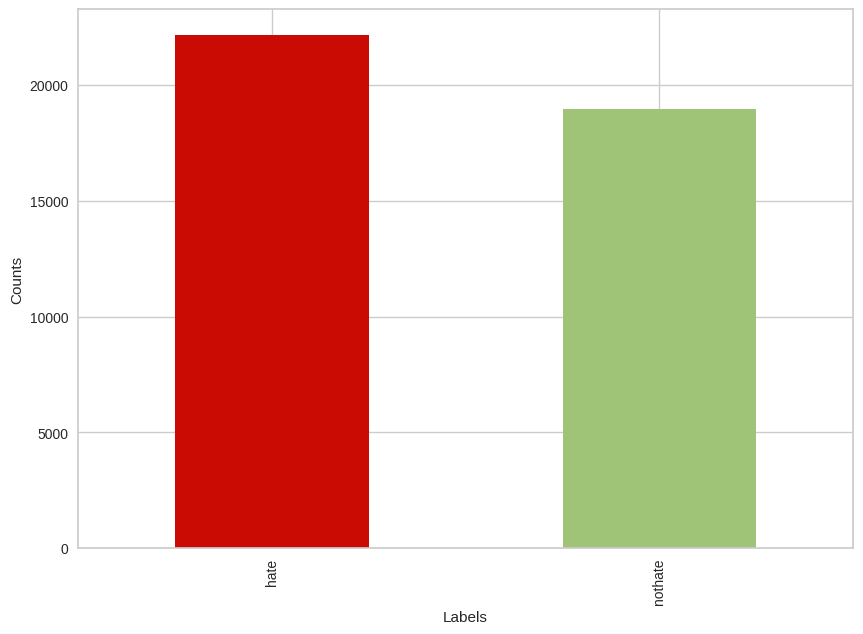

In [ ]:
import matplotlib.pyplot as plt
color_list = list('rgbkymc')
plt.figure(figsize=(10,7))

plt.xlabel("Labels")
plt.ylabel("Counts")

hsd.label.value_counts().plot(kind='bar', color=color_list)


In [ ]:
anno_label_df=anno_label.to_frame()
anno_label_df

,label
0,hate
1,hate
2,hate
3,hate
4,hate
...,...
41139,hate
41140,hate
41141,nothate
41142,nothate


In [ ]:
#checking distribution of annotation types
anno_type = hsd['type']
anno_type.describe()

count     41136
unique        7
top        none
freq      18969
Name: type, dtype: object

In [ ]:
anno_type.value_counts()


none              18969
derogation         9901
notgiven           7110
animosity          3439
dehumanization      906
threatening         606
support             205
Name: type, dtype: int64

In [ ]:
anno_type.sort_values()

25380      animosity
30788      animosity
6776       animosity
30802      animosity
6759       animosity
            ...     
5787     threatening
5829     threatening
5834     threatening
5855     threatening
41143    threatening
Name: type, Length: 41136, dtype: object

<Axes: xlabel='Types', ylabel='Counts'>

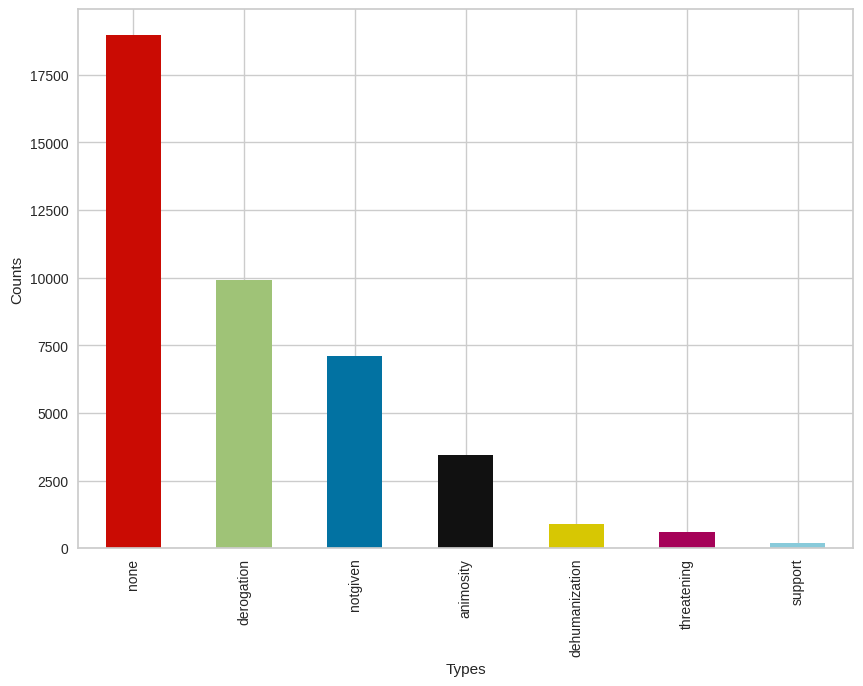

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,7))

plt.xlabel("Types")
plt.ylabel("Counts")

hsd.type.value_counts().plot(kind='bar', color=color_list)

In [ ]:
anno_type_df=anno_type.to_frame()
anno_type_df

,type
0,notgiven
1,notgiven
2,notgiven
3,notgiven
4,notgiven
...,...
41139,notgiven
41140,derogation
41141,none
41142,none


In [ ]:
#checking distribution of annotation target
anno_target = hsd['target']
anno_target.describe()

count     41136
unique      409
top        none
freq      18969
Name: target, dtype: object

In [ ]:
anno_target.value_counts()


none                         18969
notgiven                      7110
wom                           2035
bla                           1961
jew                           1096
                             ...  
trans, immig                     1
asi.south, gay                   1
asi.south, mixed.race            1
dis, bla, wom, gay, immig        1
jew, mixed.race, gay             1
Name: target, Length: 409, dtype: int64

In [ ]:
anno_target.sort_values()

1849            african
9390            african
21827           african
3448            african
14017           african
              ...      
18960    wom, non.white
33152    wom, non.white
9698           wom, pol
25330           wom, wc
25352           wom, wc
Name: target, Length: 41136, dtype: object

<Axes: xlabel='Targets', ylabel='Counts'>

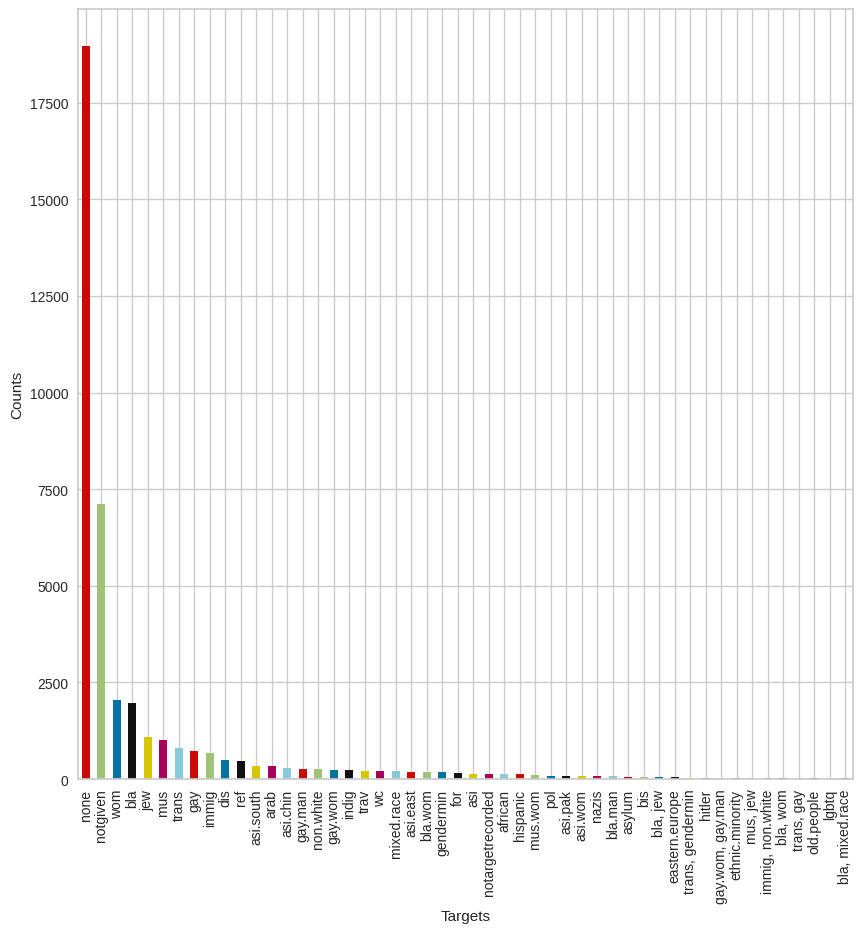

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))

plt.xlabel("Targets")
plt.ylabel("Counts")

hsd.target.value_counts().head(50).plot(kind='bar', color=color_list)

In [ ]:
#frequency of targets in list form - top 50
import collections

# using Counter to find frequency of elements
frequency = collections.Counter(anno_target).most_common(50)

# printing the frequency
print(frequency)

[('none', 18969), ('notgiven', 7110), ('wom', 2035), ('bla', 1961), ('jew', 1096), ('mus', 1002), ('trans', 792), ('gay', 724), ('immig', 672), ('dis', 489), ('ref', 470), ('asi.south', 338), ('arab', 338), ('asi.chin', 278), ('gay.man', 271), ('non.white', 260), ('gay.wom', 246), ('indig', 239), ('trav', 217), ('wc', 211), ('mixed.race', 201), ('asi.east', 188), ('bla.wom', 186), ('gendermin', 178), ('for', 167), ('asi', 139), ('notargetrecorded', 129), ('african', 123), ('hispanic', 119), ('mus.wom', 117), ('pol', 88), ('asi.pak', 85), ('asi.wom', 74), ('nazis', 71), ('bla.man', 71), ('asylum', 67), ('bis', 57), ('bla, jew', 50), ('eastern.europe', 49), ('trans, gendermin', 39), ('hitler', 38), ('gay.wom, gay.man', 29), ('ethnic.minority', 28), ('mus, jew', 27), ('immig, non.white', 27), ('bla, wom', 25), ('old.people', 23), ('trans, gay', 23), ('lgbtq', 21), ('indig.wom', 20)]


In [ ]:
anno_target_df=anno_target.to_frame()
anno_target_df

,target
0,notgiven
1,notgiven
2,notgiven
3,notgiven
4,notgiven
...,...
41139,notgiven
41140,wom
41141,none
41142,none


In [ ]:
#get character length of text segments
hsd["length"] = hsd['text'].apply(len)

In [ ]:
hsd.head()

,acl.id,text,label,type,target,length
0,acl1,dalits are lowlives,hate,notgiven,notgiven,19
1,acl10,gay people are a burden to our society,hate,notgiven,notgiven,38
2,acl100,Arabs are not welcome,hate,notgiven,notgiven,21
3,acl1000,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,93
4,acl10000,bananas are for black people,hate,notgiven,notgiven,28


In [ ]:
#import matplotlib and seaborn
import matplotlib as plt
import seaborn as sns

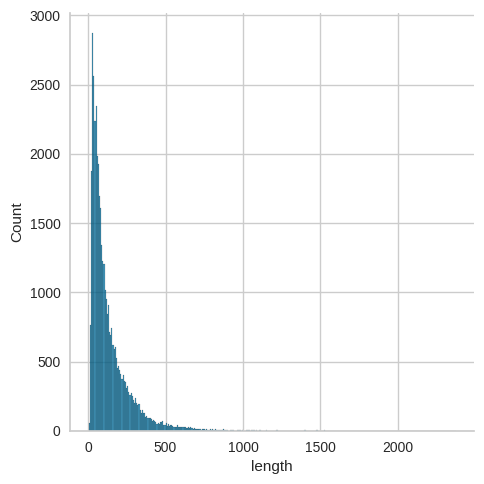

In [ ]:
#plot of length
sns.displot(hsd['length'], kde=False)

In [ ]:
#pre-processing data
#getting a look at a sample of our text
hsd['text'].sample(frac=0.01)

271                              Muslims revile terrorists
29755           But we must make immigrants feel inferior.
5591     Survival International is a Pocahontas saviour...
10060    blame it on the JOOS, blame it on the JOOS, am...
9358     Pakistan has some really beautiful sites and I...
                               ...                        
37286     refugees make me uncomfortable in my own country
11515    She totally misread the room and then said tha...
2974                 i found actual shit in the trash can!
35300                     i have a rat problem in my house
37328                             blacks cannot be trusted
Name: text, Length: 411, dtype: object

In [ ]:
hsd['raw_text']=hsd['text']
hsd.head()

,acl.id,text,label,type,target,length,raw_text
0,acl1,dalits are lowlives,hate,notgiven,notgiven,19,dalits are lowlives
1,acl10,gay people are a burden to our society,hate,notgiven,notgiven,38,gay people are a burden to our society
2,acl100,Arabs are not welcome,hate,notgiven,notgiven,21,Arabs are not welcome
3,acl1000,I'm not saying we should actually eliminate he...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...
4,acl10000,bananas are for black people,hate,notgiven,notgiven,28,bananas are for black people


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


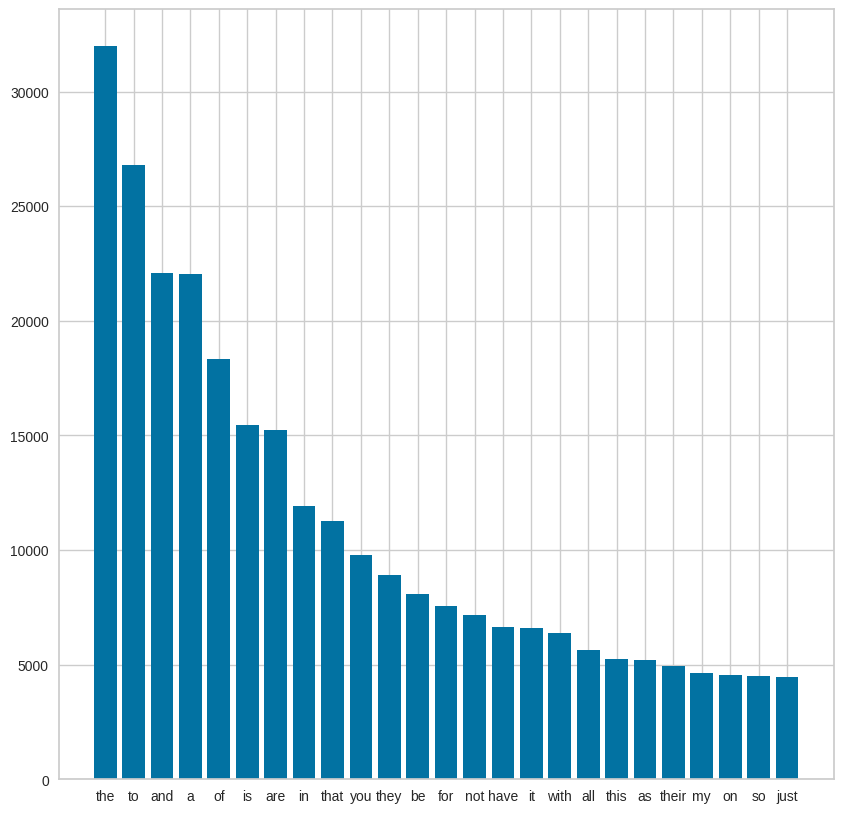

In [ ]:
#frequency of stopwords in text for top 25

import nltk
import matplotlib.pyplot as plt
nltk.download('stopwords')
from nltk.corpus import stopwords

def plot_top_stopwords_barchart(text):
    stop=set(stopwords.words('english'))

    new=text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stop:
            dic[word]+=1

    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:25]
    x,y=zip(*top)
    plt.figure(figsize=(10,10))
    plt.bar(x,y)

plot_top_stopwords_barchart(hsd['raw_text'])

In [ ]:
#spell-checking (taking way too long, skipping)
#import warnings
#warnings.filterwarnings("ignore")

#from textblob import TextBlob
#hsd['text'] = hsd['text'].apply(lambda x : str(TextBlob(x).correct()))
#hsd['text']

In [ ]:
#clean text
import numpy
import re
import string
import unicodedata
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
!pip install contractions
import contractions

hsd['text'] = hsd['text'].apply(lambda x: [contractions.fix(word) for word in x.split()])
hsd['text'] = [' '.join(map(str, l)) for l in hsd['text']]

In [ ]:
nltk.download('wordnet')

def process_text(text):
    text = text.lower()
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text=re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '', text)
    text=re.sub("@[A-Za-z0-9_]+","", text) #Remove mentions
    text=re.sub("#[A-Za-z0-9_]+","", text) #Remove hashtags
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = " ".join([word for word in str(text).split() if word not in stop_words])
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    return text

hsd["text"] = hsd["text"].apply(process_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
hsd.head()

,acl.id,text,label,type,target,length,raw_text
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people


In [ ]:
#remove any emojis
import re

def remove_emojis(social_media):
  pat =      re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
  return pat.sub(r'', social_media)

hsd['text']=hsd['text'].apply(remove_emojis)
hsd['text'].sample(frac=0.01)

24960                except woman da mag f ri every aspect
13341    pardon unpopular opinion problem immigrant cen...
9328                            j e e e e e e ew h r c r p
35686                              really want visit niger
20285           shit show tory wnkers want people struggle
                               ...                        
4802     people take responsibility birth control intel...
20237    hope thought arabic could benefit sadly kid pl...
28388    literally reason migrate russia work really ha...
38843          black people london resisted slavery escape
22644    cannot wait time year xmas mg long graced vlog...
Name: text, Length: 411, dtype: object

In [ ]:
#remove any empty strings after cleaning
import string

def remove_empty_strings1(social_media):
    social_media = re.sub(r"^\s+|\s+$", 'NaN', social_media)
    return social_media

hsd['text'] = hsd['text'].apply(remove_empty_strings1)

In [ ]:
#remove rows of empty string

hsd = hsd[hsd['text'] != 'NaN']

In [ ]:
hsd.shape

(41136, 7)

In [ ]:
hsd.head()

,acl.id,text,label,type,target,length,raw_text
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people


In [ ]:
#tokenization
#import nltk
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
hsd['tokenized_sent'] = hsd['text'].apply(sent_tokenize)
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives]
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society]
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome]
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people]


In [ ]:
hsd['tokenized_word'] = hsd['text'].apply(word_tokenize)
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent,tokenized_word
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives],"[dalits, lowlives]"
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society],"[gay, people, burden, society]"
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome],"[arab, welcome]"
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...,"[saying, actually, eliminate, heebs, wish, nat..."
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people],"[banana, black, people]"


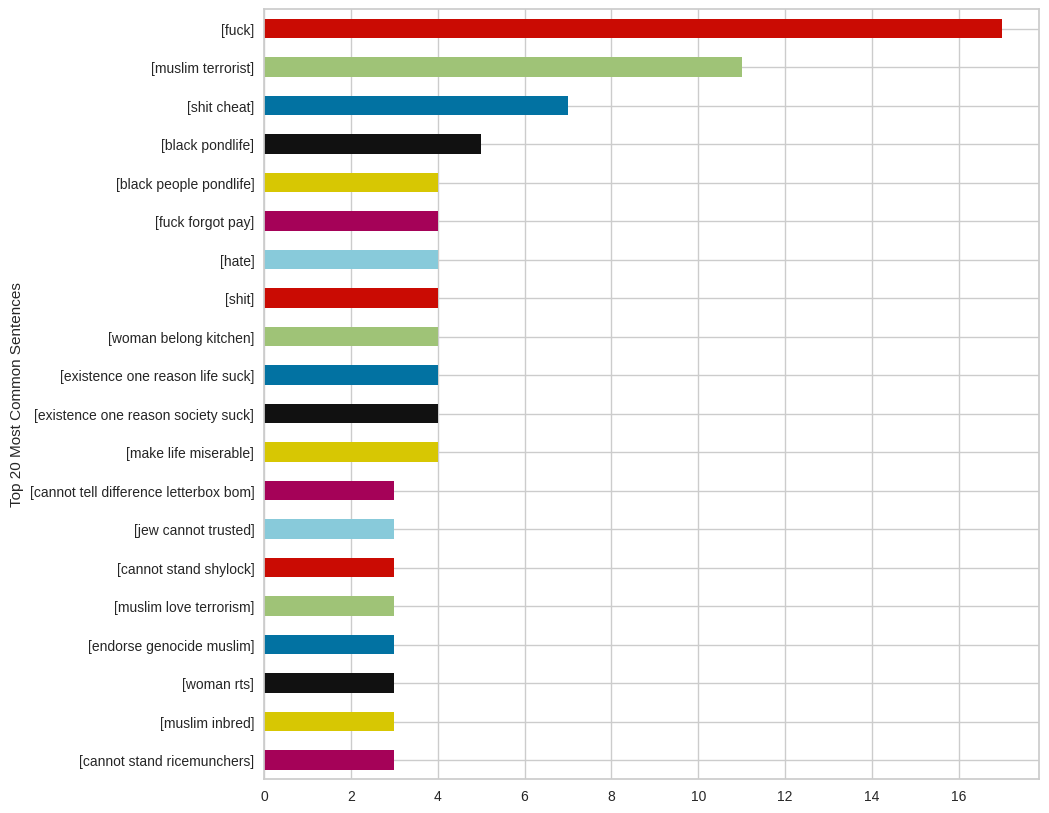

In [ ]:
import matplotlib.pyplot as plt
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))

plt.xlabel("Counts")
plt.ylabel("Top 20 Most Common Sentences")

hsd.tokenized_sent.value_counts().head(20).plot(kind='barh', color=color_list).invert_yaxis()


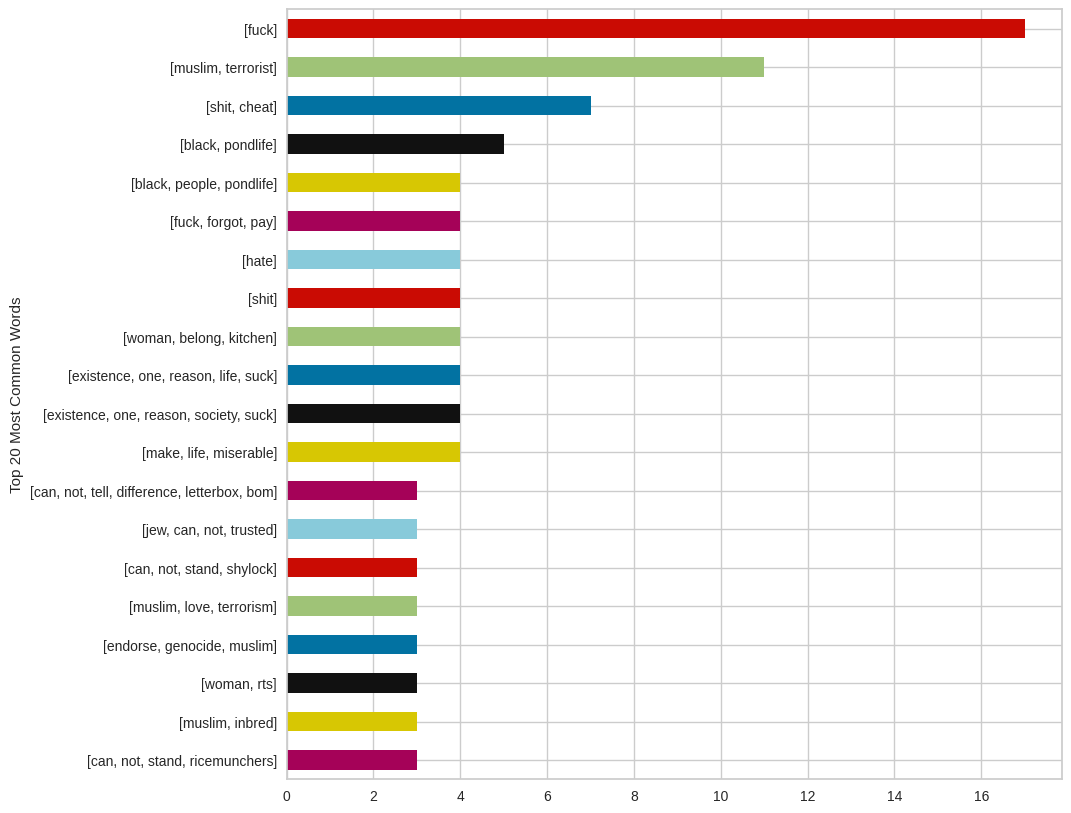

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))

plt.xlabel("Counts")
plt.ylabel("Top 20 Most Common Words")

hsd.tokenized_word.value_counts().head(20).plot(kind='barh', color=color_list).invert_yaxis()

In [ ]:
#preparing for lemmatization
#POS tagging
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [ ]:
hsd['pos_tags'] = hsd['tokenized_word'].apply(nltk.tag.pos_tag)
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent,tokenized_word,pos_tags
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives],"[dalits, lowlives]","[(dalits, NNS), (lowlives, NNS)]"
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society],"[gay, people, burden, society]","[(gay, JJ), (people, NNS), (burden, VBP), (soc..."
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome],"[arab, welcome]","[(arab, JJ), (welcome, NN)]"
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...,"[saying, actually, eliminate, heebs, wish, nat...","[(saying, VBG), (actually, RB), (eliminate, VB..."
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people],"[banana, black, people]","[(banana, JJ), (black, JJ), (people, NNS)]"


In [ ]:
#distribution of POS in random sample
!pip install -U yellowbrick
from yellowbrick.text import PosTagVisualizer

[('hiv', 'NN'), ('god', 'JJ'), ('way', 'NN'), ('trying', 'VBG'), ('stop', 'JJ'), ('gay', 'NN')]
[('strip', 'NN'), ('club', 'NN'), ('bar', 'NN'), ('deny', 'NN'), ('service', 'NN'), ('whoever', 'WP'), ('reason', 'NN'), ('big', 'JJ'), ('tech', 'NN'), ('silenceban', 'NN'), ('whoever', 'WP'), ('want', 'VBP'), ('reason', 'NN'), ('come', 'VB'), ('face', 'NN'), ('repercussion', 'NN'), ('guess', 'NN'), ('conpanies', 'NNS'), ('refusing', 'VBG'), ('serve', 'NN'), ('gay', 'NN'), ('people', 'NNS'), ('follows', 'VBZ'), ('logic', 'JJ')]
[('mike', 'VB'), ('new', 'JJ'), ('bird', 'NN'), ('stunner', 'NN'), ('like', 'IN'), ('piece', 'NN'), ('eye', 'NN'), ('candy', 'NN')]
[('news', 'NN'), ('year', 'NN'), ('resolution', 'NN'), ('number', 'NN'), ('cultivate', 'NN'), ('friendship', 'JJ'), ('number', 'NN'), ('band', 'NN'), ('together', 'RB'), ('execute', 'JJ'), ('selfimprovement', 'NN'), ('plan', 'NN')]
[('cop', 'NN'), ('pepper', 'NN'), ('spray', 'NN'), ('attack', 'NN'), ('regard', 'NN'), ('law', 'NN')]
[('abs

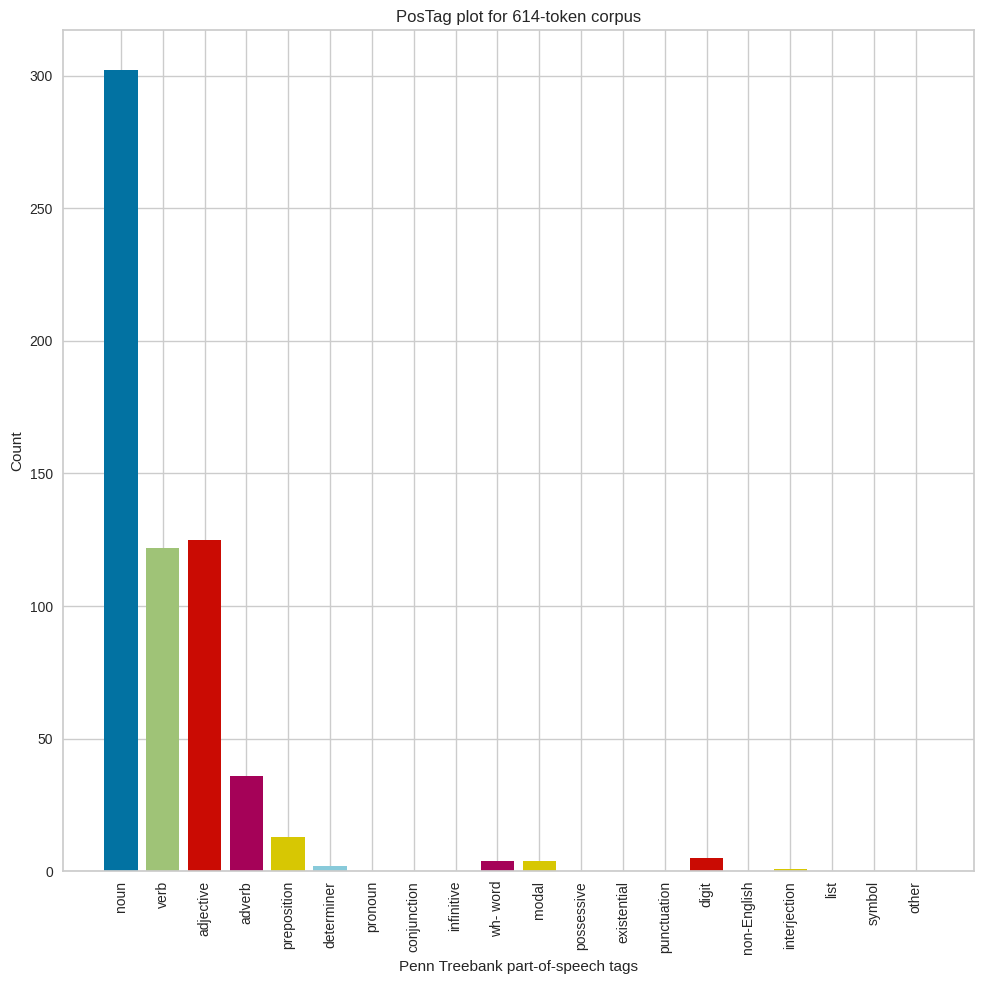

<Axes: title={'center': 'PosTag plot for 614-token corpus'}, xlabel='Penn Treebank part-of-speech tags', ylabel='Count'>

In [ ]:
tagged_stanzas = []
tagged = []

for word in hsd['tokenized_word'].sample(50, random_state = 5):
  tagged_word = nltk.pos_tag(word)
  print(tagged_word)

  tagged_stanzas.append(tagged_word)

tagged.append(tagged_stanzas)

plt.figure(figsize=(10,10))
viz = PosTagVisualizer()
viz.fit(tagged)
viz.show()

In [ ]:
import nltk

for sentence in tagged_stanzas:
  print(sentence)
  pattern = "NP: {<DT>?<JJ>*<NN>}"
  NPChunker = nltk.RegexpParser(pattern)
  result = NPChunker.parse(sentence)
  result.pprint()
  print()

[('hiv', 'NN'), ('god', 'JJ'), ('way', 'NN'), ('trying', 'VBG'), ('stop', 'JJ'), ('gay', 'NN')]
(S (NP hiv/NN) (NP god/JJ way/NN) trying/VBG (NP stop/JJ gay/NN))

[('strip', 'NN'), ('club', 'NN'), ('bar', 'NN'), ('deny', 'NN'), ('service', 'NN'), ('whoever', 'WP'), ('reason', 'NN'), ('big', 'JJ'), ('tech', 'NN'), ('silenceban', 'NN'), ('whoever', 'WP'), ('want', 'VBP'), ('reason', 'NN'), ('come', 'VB'), ('face', 'NN'), ('repercussion', 'NN'), ('guess', 'NN'), ('conpanies', 'NNS'), ('refusing', 'VBG'), ('serve', 'NN'), ('gay', 'NN'), ('people', 'NNS'), ('follows', 'VBZ'), ('logic', 'JJ')]
(S
  (NP strip/NN)
  (NP club/NN)
  (NP bar/NN)
  (NP deny/NN)
  (NP service/NN)
  whoever/WP
  (NP reason/NN)
  (NP big/JJ tech/NN)
  (NP silenceban/NN)
  whoever/WP
  want/VBP
  (NP reason/NN)
  come/VB
  (NP face/NN)
  (NP repercussion/NN)
  (NP guess/NN)
  conpanies/NNS
  refusing/VBG
  (NP serve/NN)
  (NP gay/NN)
  people/NNS
  follows/VBZ
  logic/JJ)

[('mike', 'VB'), ('new', 'JJ'), ('bird', 'NN'

In [ ]:
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [ ]:
hsd['wordnet_pos'] = hsd['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent,tokenized_word,pos_tags,wordnet_pos
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives],"[dalits, lowlives]","[(dalits, NNS), (lowlives, NNS)]","[(dalits, n), (lowlives, n)]"
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society],"[gay, people, burden, society]","[(gay, JJ), (people, NNS), (burden, VBP), (soc...","[(gay, a), (people, n), (burden, v), (society,..."
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome],"[arab, welcome]","[(arab, JJ), (welcome, NN)]","[(arab, a), (welcome, n)]"
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...,"[saying, actually, eliminate, heebs, wish, nat...","[(saying, VBG), (actually, RB), (eliminate, VB...","[(saying, v), (actually, r), (eliminate, v), (..."
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people],"[banana, black, people]","[(banana, JJ), (black, JJ), (people, NNS)]","[(banana, a), (black, a), (people, n)]"


In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer

In [ ]:
wnl = WordNetLemmatizer()
hsd['lemmatized'] = hsd['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent,tokenized_word,pos_tags,wordnet_pos,lemmatized
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives],"[dalits, lowlives]","[(dalits, NNS), (lowlives, NNS)]","[(dalits, n), (lowlives, n)]","[dalits, lowlives]"
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society],"[gay, people, burden, society]","[(gay, JJ), (people, NNS), (burden, VBP), (soc...","[(gay, a), (people, n), (burden, v), (society,...","[gay, people, burden, society]"
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome],"[arab, welcome]","[(arab, JJ), (welcome, NN)]","[(arab, a), (welcome, n)]","[arab, welcome]"
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...,"[saying, actually, eliminate, heebs, wish, nat...","[(saying, VBG), (actually, RB), (eliminate, VB...","[(saying, v), (actually, r), (eliminate, v), (...","[say, actually, eliminate, heebs, wish, natura..."
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people],"[banana, black, people]","[(banana, JJ), (black, JJ), (people, NNS)]","[(banana, a), (black, a), (people, n)]","[banana, black, people]"


In [ ]:
#save file with all new columns to csv
hsd.to_csv('hsd.csv')

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
nlp

In [ ]:
from spacy import displacy

for sentence in hsd['raw_text'].sample(5, random_state = 5):
  sentence_doc = nlp(sentence)

  displacy.render(sentence_doc, style='dep', jupyter=True)
  print("Sentence is: ", sentence_doc)

Sentence is:  HIV is gods way of trying to stop the gays


Sentence is:  Strip clubs and bars can deny service to whoever for any reason, and big tech can silence/ban whoever they want for any reason they come up with and face no repercussions, so I guess conpanies refusing to serve gay people follows this logic.


Sentence is:  Mike's new bird is a stunner, he likes a piece of eye candy


Sentence is:  News year's resolutions: Number 1. Cultivate friendships Number 2. Band together to execute our self-improvement plans.


Sentence is:  cops will pepper spray and attack you, they themselves have no regard for the law


In [ ]:
for sentence in hsd['raw_text'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)

  for chunk in sentence_doc.noun_chunks:
    print ("Chunked noun phrases found: ",chunk)
  print()

Sentence is:  HIV is gods way of trying to stop the gays
Chunked noun phrases found:  HIV
Chunked noun phrases found:  gods
Chunked noun phrases found:  way
Chunked noun phrases found:  the gays

Sentence is:  Strip clubs and bars can deny service to whoever for any reason, and big tech can silence/ban whoever they want for any reason they come up with and face no repercussions, so I guess conpanies refusing to serve gay people follows this logic.
Chunked noun phrases found:  Strip clubs
Chunked noun phrases found:  bars
Chunked noun phrases found:  service
Chunked noun phrases found:  whoever
Chunked noun phrases found:  any reason
Chunked noun phrases found:  big tech
Chunked noun phrases found:  whoever
Chunked noun phrases found:  they
Chunked noun phrases found:  any reason
Chunked noun phrases found:  they
Chunked noun phrases found:  no repercussions
Chunked noun phrases found:  I
Chunked noun phrases found:  conpanies
Chunked noun phrases found:  gay people
Chunked noun phrases

In [ ]:
for sentence in hsd['raw_text'].sample(5, random_state = 5):
  print("Sentence is: ", sentence)
  sentence_doc = nlp(sentence)
  displacy.render(sentence_doc,style='ent',jupyter=True)
  print()

Sentence is:  HIV is gods way of trying to stop the gays



Sentence is:  Strip clubs and bars can deny service to whoever for any reason, and big tech can silence/ban whoever they want for any reason they come up with and face no repercussions, so I guess conpanies refusing to serve gay people follows this logic.



Sentence is:  Mike's new bird is a stunner, he likes a piece of eye candy



Sentence is:  News year's resolutions: Number 1. Cultivate friendships Number 2. Band together to execute our self-improvement plans.



Sentence is:  cops will pepper spray and attack you, they themselves have no regard for the law


In [ ]:
from tqdm import tqdm, tqdm_notebook

nlp = spacy.load('en_core_web_sm',
                 disable=['parser',
                          'tagger',
                          'textcat',
                          'lemmatizer'])

In [ ]:
frames = []
for i in tqdm_notebook(range(1000)):
    doc = hsd.loc[i,'text']
    text_id = hsd.loc[i,'acl.id']
    doc = nlp(doc)

    ents = [(e.text, e.start_char, e.end_char, e.label_) for e in doc.ents if len(e.text.strip(' -—')) > 0]
    frame = pd.DataFrame(ents)
    frame['acl.id'] = text_id
    frames.append(frame)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
ner = pd.concat(frames)
ner.columns = ['id','Text','Start', 'Stop' , 'NER_Type']
ner.tail()

,id,Text,Start,Stop,NER_Type
0,acl10906,muslim,0.0,6.0,NORP
0,acl10907,white house,7.0,18.0,ORG
0,acl10912,congress,0.0,8.0,ORG
0,acl10914,vietnamese,5.0,15.0,NORP
1,acl10914,vietnam,82.0,89.0,GPE


<Axes: xlabel='NER Types', ylabel='Counts'>

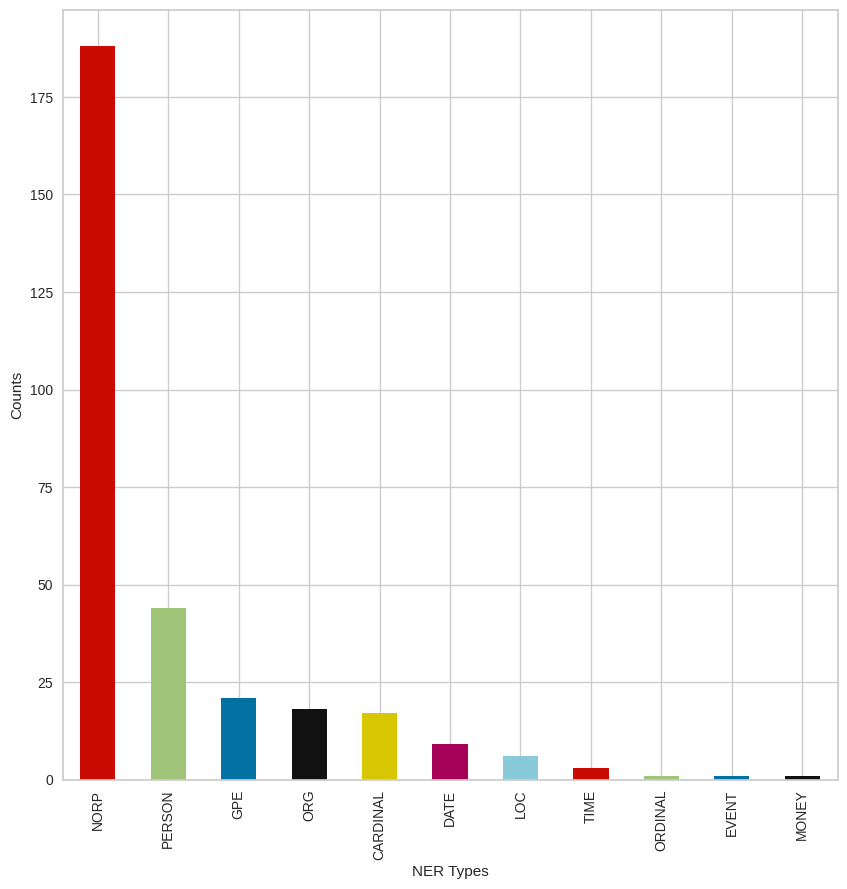

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))
plt.xlabel("NER Types")
plt.ylabel("Counts")

ner.NER_Type.value_counts().plot(kind='bar', color = color_list)

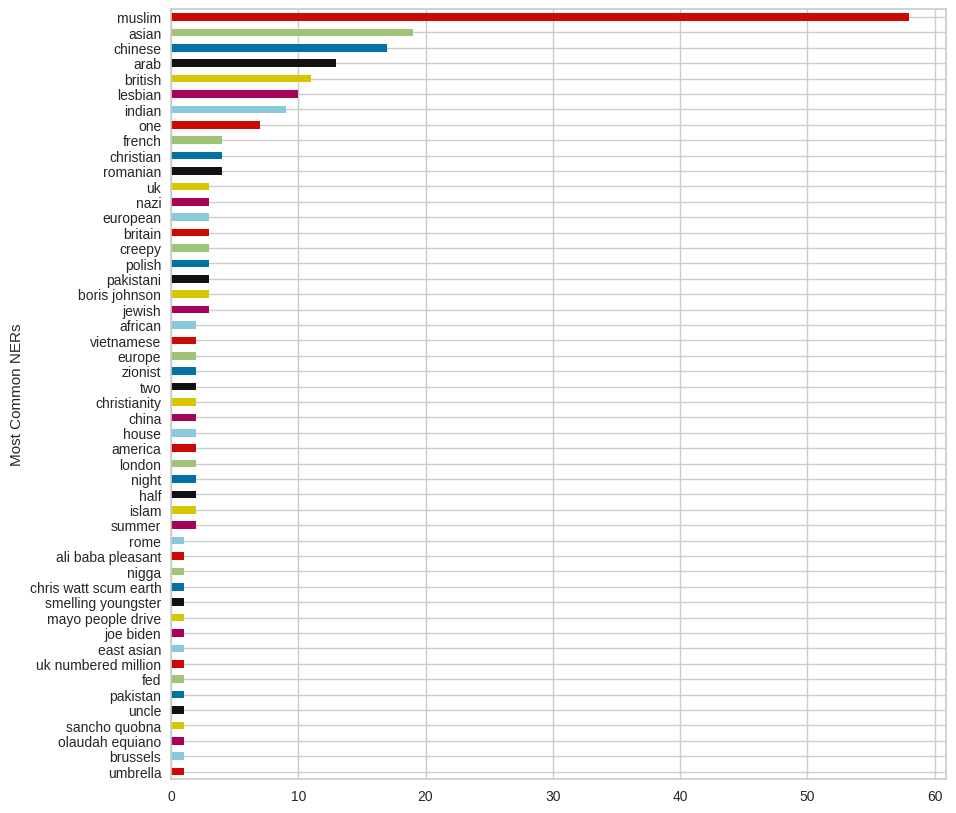

In [ ]:
color_list = list('rgbkymc')
plt.figure(figsize=(10,10))
plt.xlabel("Counts")
plt.ylabel("Most Common NERs")

ner.Text.value_counts()[:50].plot(kind='barh', color = color_list).invert_yaxis()

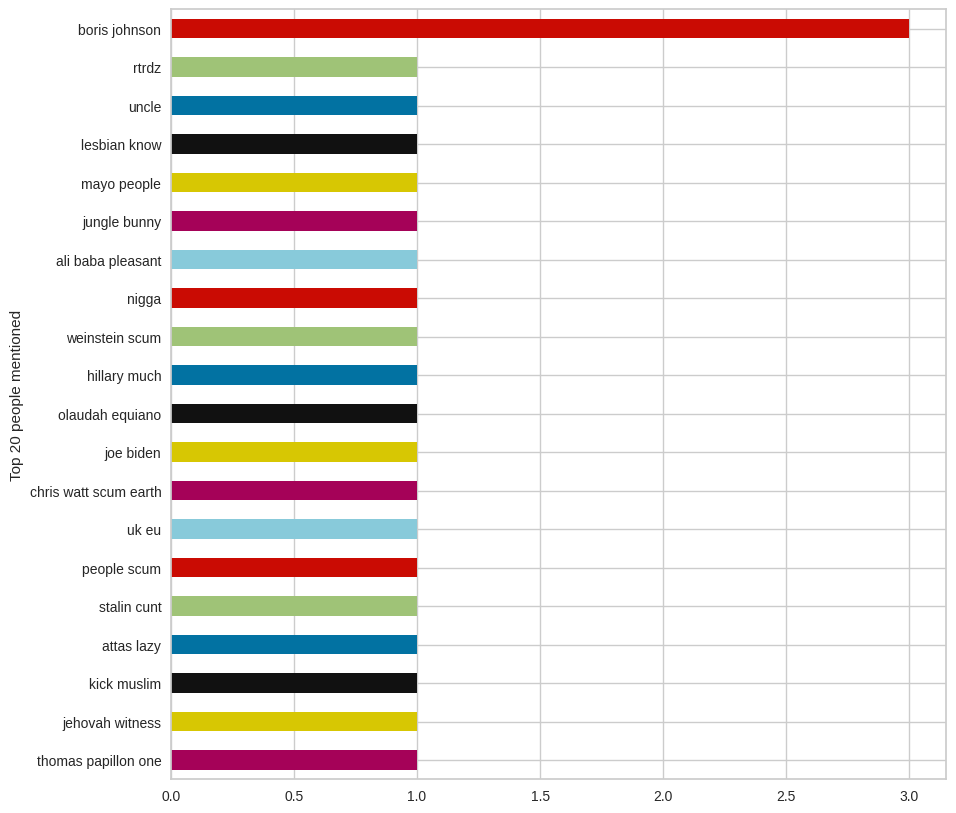

In [ ]:
people= ner[ner.NER_Type == 'PERSON']
plt.figure(figsize=(10,10))
plt.xlabel("Counts")
plt.ylabel("Top 20 people mentioned")

people.Text.value_counts()[:20].plot(kind='barh', color = color_list).invert_yaxis()

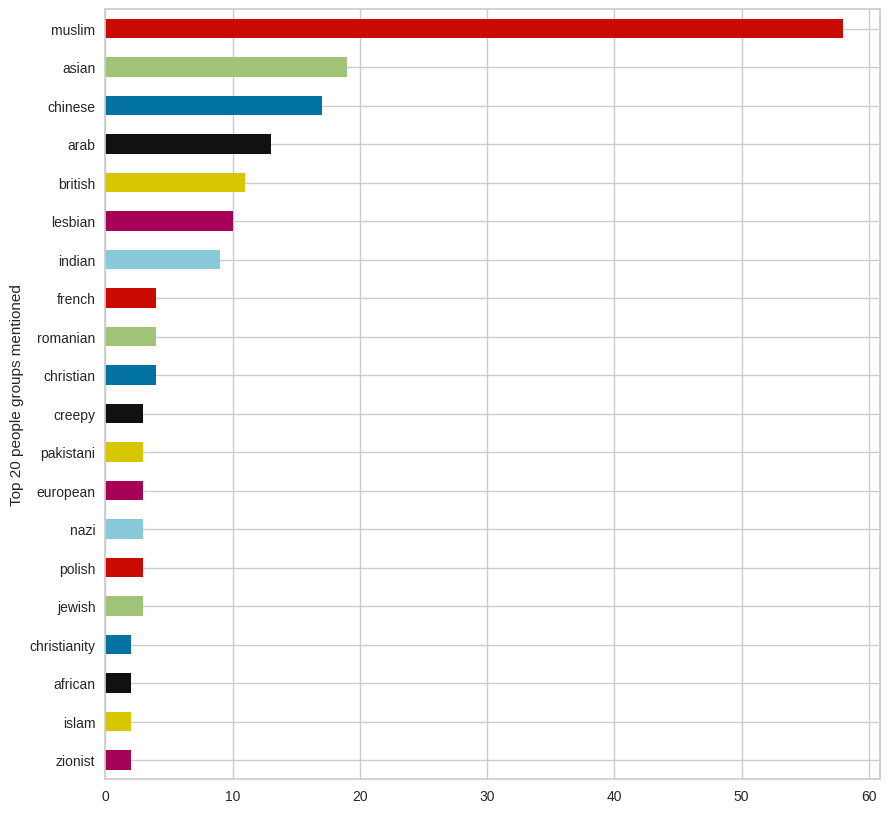

In [ ]:
people_group= ner[ner.NER_Type == 'NORP']
plt.figure(figsize=(10,10))
plt.xlabel("Counts")
plt.ylabel("Top 20 people groups mentioned")

people_group.Text.value_counts()[:20].plot(kind='barh', color = color_list).invert_yaxis()

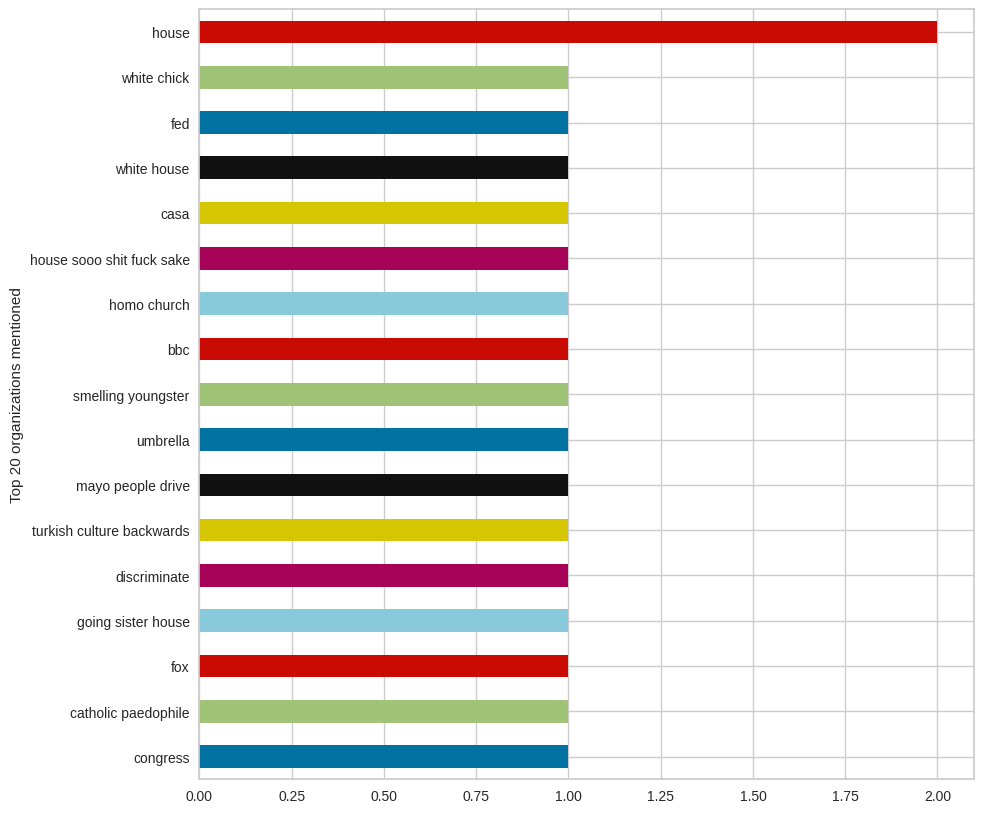

In [ ]:
org= ner[ner.NER_Type == 'ORG']
plt.figure(figsize=(10,10))
plt.xlabel("Counts")
plt.ylabel("Top 20 organizations mentioned")

org.Text.value_counts()[:20].plot(kind='barh', color = color_list).invert_yaxis()

In [ ]:
#NER not working perfectly - would need to evaluate and re-annotate for better results

In [ ]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

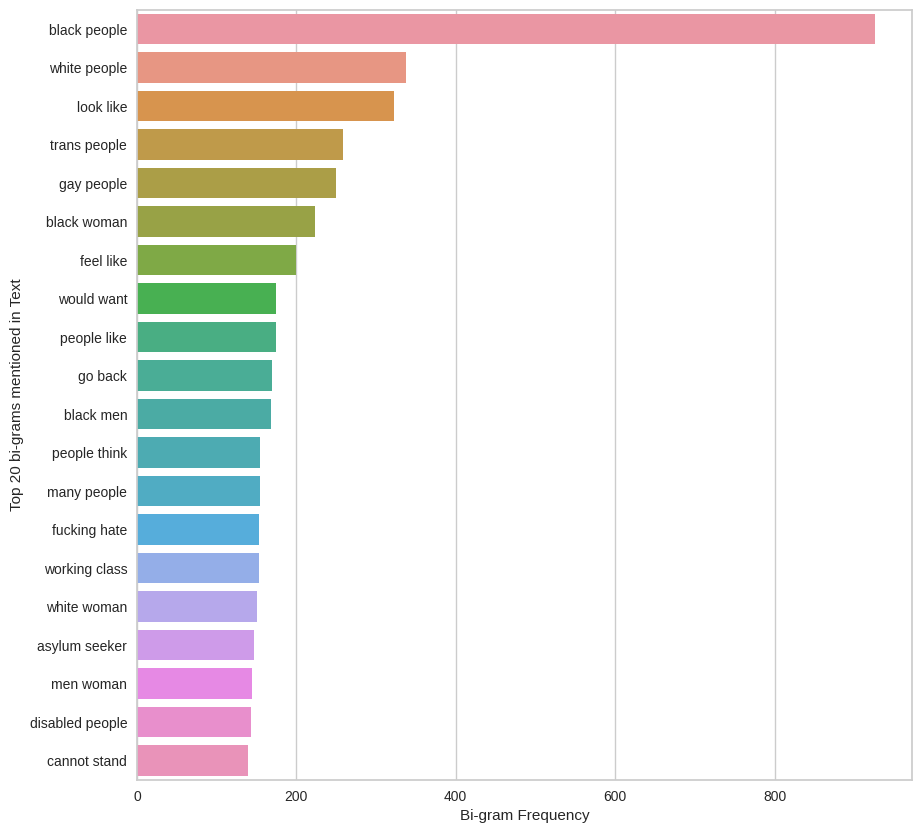

In [ ]:
#Bi-grams

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new=text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq=sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_bigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_bigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Bi-gram Frequency")
    plt.ylabel("Top 20 bi-grams mentioned in Text")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(hsd['text'],2)


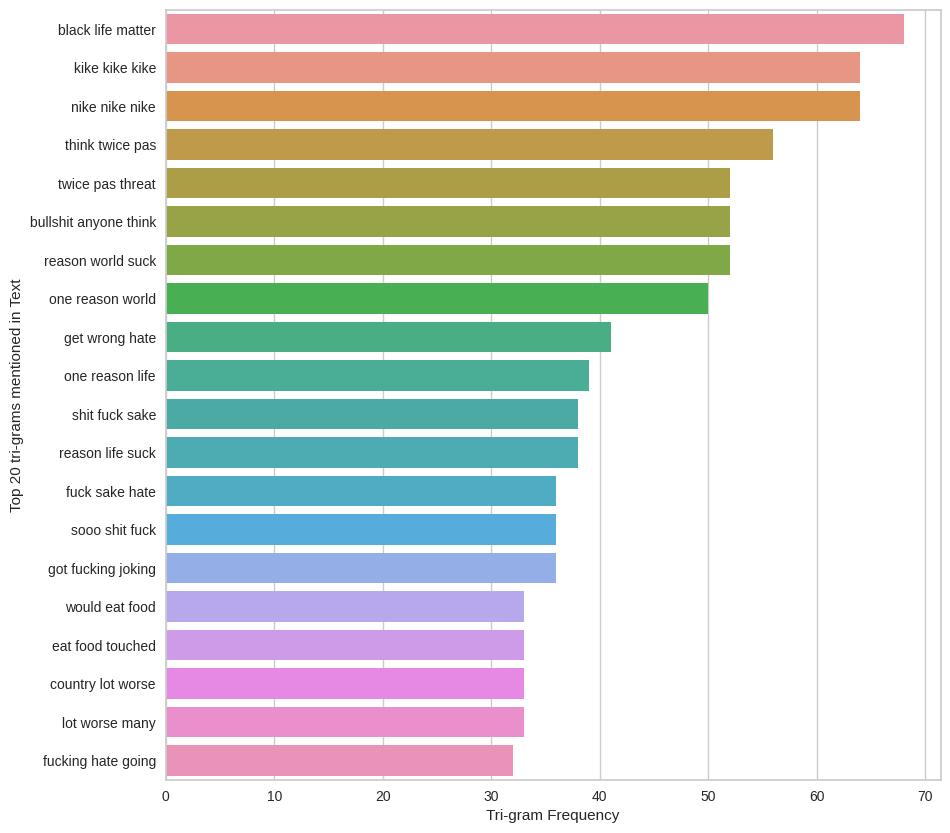

In [ ]:
#Tri-grams

def plot_top_ngrams_barchart(text, n=3):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:20]

    top_n_trigrams=_get_top_ngram(text,n)[:20]
    x,y=map(list,zip(*top_n_trigrams))
    plt.figure(figsize=(10,10))
    plt.xlabel("Tri-gram Frequency")
    plt.ylabel("Top 20 tri-grams mentioned in Text")
    sns.barplot(x=y,y=x)


plot_top_ngrams_barchart(hsd['text'],3)


In [ ]:
!pip install wordcloud
from wordcloud import WordCloud

In [ ]:
hsd.head()

,acl.id,text,label,type,target,length,raw_text,tokenized_sent,tokenized_word,pos_tags,wordnet_pos,lemmatized
0,acl1,dalits lowlives,hate,notgiven,notgiven,19,dalits are lowlives,[dalits lowlives],"[dalits, lowlives]","[(dalits, NNS), (lowlives, NNS)]","[(dalits, n), (lowlives, n)]","[dalits, lowlives]"
1,acl10,gay people burden society,hate,notgiven,notgiven,38,gay people are a burden to our society,[gay people burden society],"[gay, people, burden, society]","[(gay, JJ), (people, NNS), (burden, VBP), (soc...","[(gay, a), (people, n), (burden, v), (society,...","[gay, people, burden, society]"
2,acl100,arab welcome,hate,notgiven,notgiven,21,Arabs are not welcome,[arab welcome],"[arab, welcome]","[(arab, JJ), (welcome, NN)]","[(arab, a), (welcome, n)]","[arab, welcome]"
3,acl1000,saying actually eliminate heebs wish naturally...,hate,notgiven,notgiven,93,I'm not saying we should actually eliminate he...,[saying actually eliminate heebs wish naturall...,"[saying, actually, eliminate, heebs, wish, nat...","[(saying, VBG), (actually, RB), (eliminate, VB...","[(saying, v), (actually, r), (eliminate, v), (...","[say, actually, eliminate, heebs, wish, natura..."
4,acl10000,banana black people,hate,notgiven,notgiven,28,bananas are for black people,[banana black people],"[banana, black, people]","[(banana, JJ), (black, JJ), (people, NNS)]","[(banana, a), (black, a), (people, n)]","[banana, black, people]"


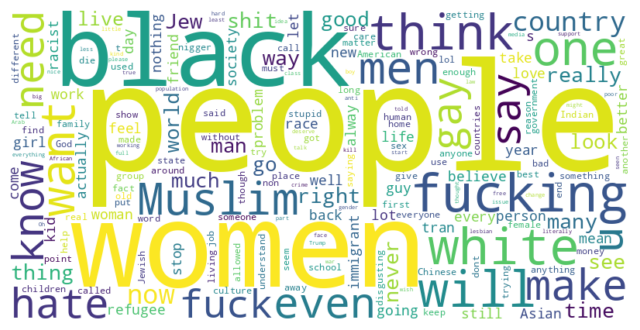

In [ ]:
#wordcloud on raw text (no cleaning)
word_cloud_text = " ".join(word for word in hsd.raw_text)

wc = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(word_cloud_text)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
!pip install scattertext
import scattertext as st
from IPython.display import IFrame, display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

In [ ]:
hate_nothate_msgs = hsd.loc[:1000, ['tokenized_word', 'label']]
hate_nothate_msgs.head()

,tokenized_word,label
0,"[dalits, lowlives]",hate
1,"[gay, people, burden, society]",hate
2,"[arab, welcome]",hate
3,"[saying, actually, eliminate, heebs, wish, nat...",hate
4,"[banana, black, people]",hate


In [ ]:
import warnings
warnings.filterwarnings("ignore")
# converting token lists to strings using join() on each row of column
hate_nothate_msgs['tokenized_word'] = hate_nothate_msgs.loc[:1000, 'tokenized_word'].apply(lambda x: ', '.join(x))
hate_nothate_msgs.head()

,tokenized_word,label
0,"dalits, lowlives",hate
1,"gay, people, burden, society",hate
2,"arab, welcome",hate
3,"saying, actually, eliminate, heebs, wish, natu...",hate
4,"banana, black, people",hate


In [ ]:
import warnings
warnings.filterwarnings("ignore")

import spacy
nlp = spacy.load('en_core_web_sm')
def parsewords(text):
    text = text
    parsedtext = nlp(text)
    return parsedtext


hate_nothate_msgs['parsed'] = hate_nothate_msgs.loc[:1000,'tokenized_word'].apply(parsewords)
hate_nothate_msgs.head()

,tokenized_word,label,parsed
0,"dalits, lowlives",hate,"(dalits, ,, lowlives)"
1,"gay, people, burden, society",hate,"(gay, ,, people, ,, burden, ,, society)"
2,"arab, welcome",hate,"(arab, ,, welcome)"
3,"saying, actually, eliminate, heebs, wish, natu...",hate,"(saying, ,, actually, ,, eliminate, ,, heebs, ..."
4,"banana, black, people",hate,"(banana, ,, black, ,, people)"


In [ ]:
import scattertext as st
from IPython.display import IFrame, display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

corpus = st.CorpusFromParsedDocuments(hate_nothate_msgs.iloc[:1000,:], category_col ='label', parsed_col='parsed').build()
html = st.produce_scattertext_explorer(corpus, category = 'hate', category_name='Hate',
                                      not_category_name='Not Hate', minimum_term_frequency=10,
                                      width_in_pixels=1000, transform = st.Scalers.log_scale_standardize)
file_name = 'hate_nothate_msgs_1000.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 800, height = 700)

In [ ]:
tokenized_word_series = hate_nothate_msgs.loc[:,'tokenized_word'].astype('string')
tokenized_word_string = ' '.join(tokenized_word_series)

In [ ]:
tokenized_word_series

0                                        dalits, lowlives
1                            gay, people, burden, society
2                                           arab, welcome
3       saying, actually, eliminate, heebs, wish, natu...
4                                   banana, black, people
                              ...                        
996                                black, men, sell, drug
997                               gay, people, fuck, bomb
998     would, waste, money, buying, new, car, pregnan...
999                                        dog, eat, shit
1000           social, medium, suck, full, dickhead, liar
Name: tokenized_word, Length: 1001, dtype: string

In [ ]:
tokenized_word_string

'dalits, lowlives gay, people, burden, society arab, welcome saying, actually, eliminate, heebs, wish, naturally, became, extinct banana, black, people asian, people, shit woman, reproduce, kid, men, case hate, wearing, black, summer care, chinese, people, think try, punch, letter, box, see, one feel, sorry, poor, little, half, caste, boy, street, neither, one, thing drink, suck, awful gay, purposeless thought, world, free, black, make, happy rape, culture, immigrant, woman, even, see, rape discrimination, rtrdz, wrong, disgusting, good politician, arsehole get, rid, hindu jewish, people, look, violent shitty, camera, awful, taking, picture christianity, massive, problem, country, abolished, church, destroyed city, getting, flooded, kebab, know, type, mean always, feel, unsafe, surrounded, arab hate, politician, much, wish, got, rid going, kill, amy saying, actually, eliminate, kike, wish, naturally, became, extinct boris, johnson, cunt new, shop, block, sign, swastika, door, customer,

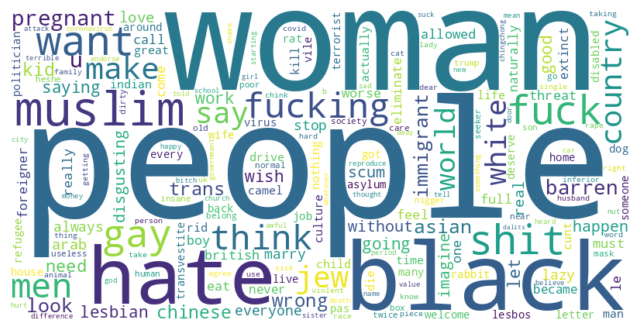

In [ ]:
#wordcloud on cleaned and tokenized text for 1st 1000 rows
word_cloud_text2 = tokenized_word_string

wc = WordCloud(width=800, height=400, collocations = False, background_color = 'white').generate(word_cloud_text2)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#getting doc ready for matcher & phrase matcher
#using 1000 rows of raw text to run through nlp object
#THESE ARE VERY SIMPLE RULES for demonstration purposes and I am not looking at how rules interact with each other
raw_text_word_series_hsd = hsd.loc[:1000,'raw_text'].astype('string')
raw_text_word_string_hsd = ' '.join(raw_text_word_series_hsd)

In [ ]:
#writing keyword and patterns with Matcher
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
from spacy import displacy
matcher = Matcher(nlp.vocab)

In [ ]:
#define doc
#used only 1000 rows for colab notebook
doc=nlp(raw_text_word_string_hsd)

In [ ]:
#print out sentences containing a keyword to create patterns from
#NOT PERFECT sentence segmentation, but will at least give an idea of context



for match_id, start, end in matches:
    string_id = nlp.vocab.strings[match_id]  # Get string representation
    span = doc[start:end]  # The matched span
    sent = span.sent
    match_ents = [{
        "start": span.start_char - sent.start_char,
        "end": span.end_char - sent.start_char,
        "label": "MATCH",
    }]
    matched_sents.append({"text": sent.text, "ents": match_ents})
    print(match_id, string_id, start, end, sent.text)

matches = matcher(doc)
matched_sents = []  # Collect data of matched sentences to be visualized

pattern = [{'LEMMA': 'woman'}]
matcher.add("woman", [pattern], on_match=collect_sents)  # add pattern


# Serve visualization of sentences containing match with displaCy
# set manual=True to make displaCy render straight from a dictionary
# (if you're not running the code within a Jupyer environment, you can
# use displacy.serve instead)
displacy.render(matched_sents, style="ent", manual=True)


18308318389743014884 woman 42 43 I just wish they naturally became extinct bananas are for black people asian people are the shit women can not reproduce kids but men can in all cases i hate wearing black in the summer!
18308318389743014884 woman 133 134 i try to punch a letter box when i see one I feel sorry for the poor little half caste boy down the street, he's neither one thing nor the other this drink sucks, it's awful gays are purposeless the thought of a world free of blacks makes me so happy It's such a rape culture with these immigrants, women don't even see it as rape discrimination against r3t4rdz is not wrong and disgusting, its good Politicians are arseholes Get rid of all the Hindus jewish people look violent This shitty camera is awful in taking pictures Christianity is a massive problem in this country, it should be abolished and the churches should be destroyed Our city is getting flooded with kebabs, you know the type I mean.
18308318389743014884 woman 377 378 why di

KeyError: ignored

In [ ]:
#look up keywords first & their immediate surrounding spans for easier view
woman_pid1 = [{'LEMMA': 'woman'}]

matcher.add('woman_pid', [woman_pid1])

matches = matcher(doc)

for match in matches:
    span = doc[match[1]-3 : match[2]+3]
    print(match[0], span.text)

6206350912622108350 are the shit women can not reproduce
6206350912622108350 these immigrants, women don't even
6206350912622108350 culture of rape women are c o
6206350912622108350 all inbred Muslim women cover because they
6206350912622108350 stamp on pregnant women this tv presenter
6206350912622108350 say I like women, but I
6206350912622108350 distinguish a Muslim women from a letterbox
6206350912622108350 don't all women are hoes Are
6206350912622108350 not be trusted women are merely sexual
6206350912622108350 You can trust women to overreact my
6206350912622108350 for not allowing women and men to
6206350912622108350 . Whoever this woman is needs some
6206350912622108350 English before foreigners women are all good
6206350912622108350 so inbred Trans women should use the
6206350912622108350 trains Hijab on women is not welcome
6206350912622108350 as well Pregnant women should be kept
6206350912622108350 dont want women anywhere other than
6206350912622108350 believe all black w

In [ ]:
#remove rule
matcher.remove("woman_pid")

In [ ]:
#write more complex rules

woman_pids = [
    [{'LEMMA': 'woman'}, {'LEMMA': 'be'}, {'POS': 'ADJ', 'OP': '*'}, {'LEMMA': {'IN': ['slut', 'inferior']}}],
    [{'LEMMA': 'woman'}, {'LEMMA': 'be'}, {'POS': 'ADV', 'OP': '*'}, {'LEMMA': 'feeble'}],
    [{'LEMMA': 'letter'}, {'LEMMA': 'box'}, {'LEMMA': 'woman'}],
    [{'POS': 'VERB'}, {'LEMMA': 'woman'}, {'LEMMA': 'in'}, {'LEMMA': {'IN': ['academia', 'army']}}],
    [{'LEMMA': 'not'}, {'LEMMA': 'marry'}, {'POS': 'ADJ', 'OP': '+'}, {'LEMMA': 'woman'}],
    [{'LOWER': {'FUZZY': 'burqa'}}, {'LEMMA': 'woman'}],
    [{'TEXT': 'should'}, {'LEMMA': 'be'}, {'LEMMA': 'rape'}],
    [{'LEMMA': 'woman'}, {'LEMMA': 'should'}, {'LEMMA': 'not'}, {'POS': 'VERB'}]
]

matcher.add('woman_pids', woman_pids)

matches = matcher(doc)

for match in matches:
    span = doc[match[1]-3 : match[2]+3]
    print(match[0], span.text)

6713026507045296142 hate jews women should be raped fucking lights in
6713026507045296142 kill Steven barren women should not live among us Chinese
6713026507045296142 a bum rap women are inferior to men at
6713026507045296142 granted. barren women are inferior as they are
6713026507045296142 I wish all letter box women would go back
6713026507045296142 and dominate barren women should not invited to kids birthday
6713026507045296142 can say all women are sluts Rat snakes are
6713026507045296142 a foreigner barren women should not live in the neighbourhood
6713026507045296142 black men should not marry white women Black women just
6713026507045296142 complete bullshit pregnant women should not work with us as
6713026507045296142 . I hate letter box women There is not
6713026507045296142 and guidance! Burqa women should be burnt
6713026507045296142 all those burqa letter box women jews cannot
6713026507045296142 it's true women are emotionally feeble Gays are secret
6713026507045296142 

In [ ]:
#demonstration of writing keyword and patterns with Phrase Matcher
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import PhraseMatcher
phrase_matcher = PhraseMatcher(nlp.vocab)

In [ ]:
#used only 1000 rows for colab notebook
doc=nlp(raw_text_word_string_hsd)

In [ ]:
phrase_list = ['women are inferior', 'pregnant women look like cows']
phrase_patterns = [nlp(text) for text in phrase_list]
phrase_matcher.add('woman_phrase', None, *phrase_patterns)
found_matches = phrase_matcher(doc)

for match in found_matches:
    span = doc[match[1]-5 : match[2]+5]
    print('Total matches found:', len(found_matches))
    print('Match found:', match, span.text)

Total matches found: 3
Match found: (2516463554115818429, 3727, 3730) that is a bum rap women are inferior to men at most things
Total matches found: 3
Match found: (2516463554115818429, 3890, 3893) everything for granted. barren women are inferior as they are unable to
Total matches found: 3
Match found: (2516463554115818429, 8759, 8764) Gays are secret amphibians. pregnant women look like cows when coming to weight I
